<h1 style='text-align:center'> <strong> Jaipur Restraunt Dataset</strong> </h1>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [3]:
plt.style.use('dark_background')

In [4]:
df=pd.read_csv('enhanced_zomato_dataset_clean.csv', index_col=False)

In [5]:
df.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Is_Bestseller,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NONE,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0


In [6]:
df.shape

(123657, 26)

<h2>Filtering only Jaipur</h2>

In [7]:
df_jaipur=df[df['City'].str.contains('Jaipur', case=False , na=False)]

In [8]:
df_jaipur.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Is_Bestseller,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
45497,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Cappuccino,BESTSELLER,...,1,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0
45498,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Smoked Chicken Sandwich,NONE,...,1,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0
45499,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Brrrista Blast Cold Coffee,BESTSELLER,...,1,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0
45500,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Penne Arrabiata Pasta - DYN,BESTSELLER,...,1,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0
45501,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Garden Fresh Pizza - DYN,BESTSELLER,...,1,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0


In [9]:
df_jaipur.dtypes

Restaurant_Name           object
Dining_Rating            float64
Delivery_Rating          float64
Dining_Votes               int64
Delivery_Votes             int64
Cuisine                   object
Place_Name                object
City                      object
Item_Name                 object
Best_Seller               object
Votes                      int64
Prices                   float64
Average_Rating           float64
Total_Votes                int64
Price_per_Vote           float64
Log_Price                float64
Is_Bestseller              int64
Restaurant_Popularity      int64
Avg_Rating_Restaurant    float64
Avg_Price_Restaurant     float64
Avg_Rating_Cuisine       float64
Avg_Price_Cuisine        float64
Avg_Rating_City          float64
Avg_Price_City           float64
Is_Highly_Rated            int64
Is_Expensive               int64
dtype: object

<h2>Stage 2: Feature Understanding and Engineering (Skill: derived metrics)</h2>

<strong>Value_for_Money = Is_Highly_Rated & not Is_Expensive</strong>

In [10]:
df_jaipur.columns = df_jaipur.columns.str.strip()

In [11]:
#to filter boolean use boolean values
df_jaipur['is_value_forMoney']=((df_jaipur['Is_Highly_Rated']==True) & (df_jaipur['Is_Expensive']==False))

C:\Users\karns\AppData\Local\Temp\ipykernel_2364\1091211540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jaipur['is_value_forMoney']=((df_jaipur['Is_Highly_Rated']==True) & (df_jaipur['Is_Expensive']==False))


In [12]:
df_jaipurValuable=df_jaipur.loc[(df_jaipur['Dining_Rating']>=4) &(df_jaipur['is_value_forMoney']==True),['Restaurant_Name','Dining_Rating','Delivery_Rating','Place_Name']]

In [13]:
df_jaipurValuable['total_rating'] = df_jaipurValuable['Dining_Rating']+df_jaipurValuable['Delivery_Rating']

In [14]:
df_jaipurValuable

,Restaurant_Name,Dining_Rating,Delivery_Rating,Place_Name,total_rating
45497,Barista Coffee,4.1,4.0,C Scheme,8.1
45498,Barista Coffee,4.1,4.0,C Scheme,8.1
45499,Barista Coffee,4.1,4.0,C Scheme,8.1
45500,Barista Coffee,4.1,4.0,C Scheme,8.1
45501,Barista Coffee,4.1,4.0,C Scheme,8.1
...,...,...,...,...,...
77564,Brown Sugar,4.1,4.2,Axis Mall,8.3
77565,Brown Sugar,4.1,4.2,Axis Mall,8.3
77566,Brown Sugar,4.1,4.2,Axis Mall,8.3
77567,Brown Sugar,4.1,4.2,Axis Mall,8.3


In [15]:
df_jaipurValuable=df_jaipurValuable.groupby('Restaurant_Name').agg({
    'Dining_Rating': 'mean',
    'Delivery_Rating': 'mean',
    'Place_Name': 'first',  
    'total_rating': 'mean'  
}).reset_index()


<h3>🚀Insight: Top 7 restraunt in jaipur with hihhestrating and value for money</h3>

In [147]:
df_jaipurValuable.nlargest(5,'total_rating')

,Restaurant_Name,Dining_Rating,Delivery_Rating,Place_Name,total_rating
16,Thali and More,4.7,4.1,C Scheme,8.8
8,Jal Mahal Ice Cream Parlour,4.1,4.4,MI Road,8.5
11,Shofu - The Momo Man,4.2,4.2,Lal Kothi,8.4
15,Tapri Pratham,4.1,4.3,Lal Kothi,8.4
3,Brown Sugar,4.1,4.2,Axis Mall,8.3


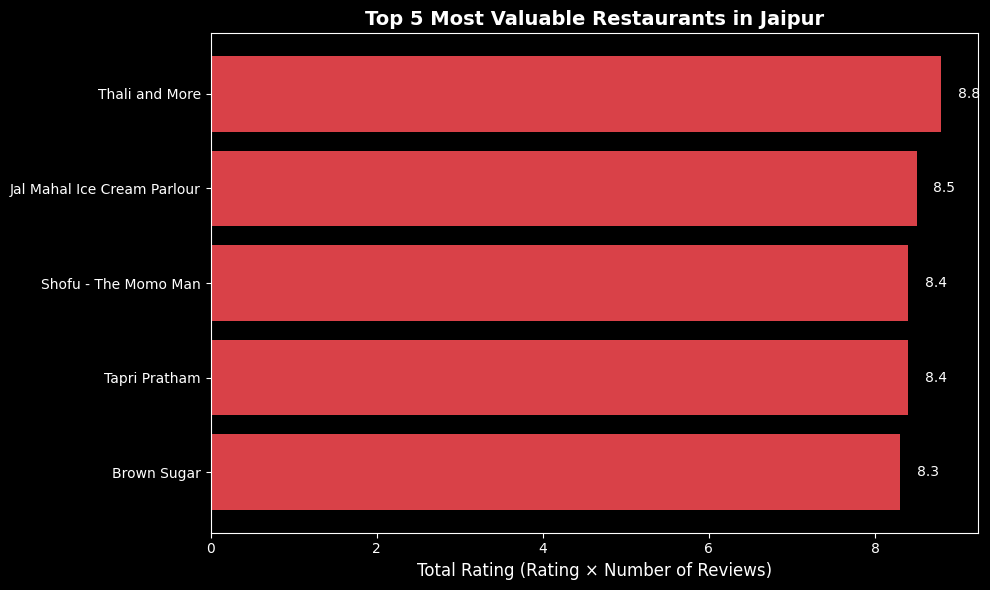

In [150]:
top5_valuable = df_jaipurValuable.nlargest(5, 'total_rating')

# Plot settings
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

bars = plt.barh(
    top5_valuable['Restaurant_Name'], 
    top5_valuable['total_rating'], 
    color='#D94148',
    
)

# Add value labels
for bar in bars:
    plt.text(
        bar.get_width() + 0.2, 
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.1f}",
        va='center', 
        fontsize=10
    )

# Titles and labels
plt.xlabel("Total Rating (Rating × Number of Reviews)", fontsize=12)
plt.title("Top 5 Restraunts", fontsize=14, weight='bold')
plt.tight_layout()
plt.gca().invert_yaxis()  # Highest on top
plt.show()

<strong>Create categories: Low/Medium/High priced based on quantiles.</strong>

In [17]:
df_jaipur.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive,is_value_forMoney
45497,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Cappuccino,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45498,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Smoked Chicken Sandwich,NONE,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45499,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Brrrista Blast Cold Coffee,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45500,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Penne Arrabiata Pasta - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45501,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Garden Fresh Pizza - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True


In [18]:
df_jaipur.dtypes

Restaurant_Name           object
Dining_Rating            float64
Delivery_Rating          float64
Dining_Votes               int64
Delivery_Votes             int64
Cuisine                   object
Place_Name                object
City                      object
Item_Name                 object
Best_Seller               object
Votes                      int64
Prices                   float64
Average_Rating           float64
Total_Votes                int64
Price_per_Vote           float64
Log_Price                float64
Is_Bestseller              int64
Restaurant_Popularity      int64
Avg_Rating_Restaurant    float64
Avg_Price_Restaurant     float64
Avg_Rating_Cuisine       float64
Avg_Price_Cuisine        float64
Avg_Rating_City          float64
Avg_Price_City           float64
Is_Highly_Rated            int64
Is_Expensive               int64
is_value_forMoney           bool
dtype: object

In [19]:
df_jaipur_Restraunts=df_jaipur.groupby('Restaurant_Name').agg({
    'Dining_Rating': 'mean',
    'Delivery_Rating':'mean',
    'Dining_Votes':'mean',
    'Delivery_Votes':'mean',
    'Place_Name':'first',
    'Votes':'mean',
    'Average_Rating':'mean',
    'Total_Votes':'mean',
    'Price_per_Vote':'mean',
    'Log_Price':'mean',
    'Restaurant_Popularity':'mean',
    'Avg_Rating_Restaurant':'mean',
    'Avg_Price_Restaurant':'mean',
    'Is_Highly_Rated': 'any',
    'Is_Expensive' : 'any',
    'is_value_forMoney':'any'
}).reset_index()

In [20]:
df_jaipur_Restraunts

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Place_Name,Votes,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Is_Highly_Rated,Is_Expensive,is_value_forMoney
0,Agarwal Caterers,3.600000,4.3,54.0,0.0,Shastri Nagar,182.494505,3.950000,54.0,42.048776,4.563021,637.0,3.950000,132.351068,False,True,False
1,Amma Ki Rasoi,3.822264,3.3,0.0,571.0,MI Road,19.238095,3.561132,571.0,95.639291,5.139276,42.0,3.561132,188.595238,False,True,False
2,Andewalaz,3.300000,4.0,41.0,0.0,Masala Chowk,8.072993,3.650000,41.0,123.424081,5.051875,137.0,3.650000,167.021898,False,True,False
3,Arham,4.100000,4.1,230.0,0.0,Ajmer Highway,4.677215,4.100000,230.0,179.901801,5.312055,316.0,4.100000,228.863924,True,True,True
4,Balaji Fast Food,3.800000,3.4,5.0,708.0,Brahmpuri,2.885714,3.600000,713.0,90.472012,4.683097,105.0,3.600000,118.095238,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,U & Me Soya Chaap,2.900000,4.1,7.0,0.0,Raja Park,42.610169,3.500000,7.0,82.084779,4.978224,59.0,3.500000,161.779661,False,False,False
88,Unlimited Pizza & Fast Food Corner,3.822264,4.0,0.0,59.0,Pink City,0.709677,3.911132,59.0,244.235663,5.538049,124.0,3.911132,267.919355,False,True,False
89,Unlimited Pizza and Fast Food Corner,3.822264,3.9,0.0,56.0,Amer Road,2.111111,3.861132,56.0,99.259204,4.682182,72.0,3.861132,115.083333,False,False,False
90,Vaishnav Dhaba,3.822264,3.9,0.0,0.0,Gopalpura,34.581818,3.861132,0.0,120.271711,5.011347,110.0,3.861132,169.927273,False,True,False


In [21]:
df_jaipur_Restraunts['Avg_Price_Restaurant'].describe()

count     92.000000
mean     212.418716
std       94.365470
min       48.150000
25%      157.681410
50%      201.413510
75%      251.763782
max      800.400000
Name: Avg_Price_Restaurant, dtype: float64

In [22]:
def restrauntCategory(Prices):
    if 48<=Prices<=158:
        return 'low'
    elif 158<=Prices<=241:
        return 'mid'
    elif 241<=Prices<=801:
        return 'high'

In [23]:
df_jaipur_Restraunts['Category'] = df_jaipur_Restraunts['Avg_Price_Restaurant'].apply(restrauntCategory)

<h2>🚀Insighht: low prices restruant in jaipur with highest rating

In [24]:
df_jaipur_Restraunts[(df_jaipur_Restraunts['Category'].str.contains('low',case=False , na=False)) & (df_jaipur_Restraunts['Average_Rating']>=4)]

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Place_Name,Votes,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Is_Highly_Rated,Is_Expensive,is_value_forMoney,Category
12,Burger Shack,3.900000,4.2,78.0,0.0,C Scheme,71.040984,4.050000,78.0,8.372025,4.745225,122.0,4.050000,124.836066,True,False,True,low
29,Ghungroo Seth Vada Pav Company,3.822264,4.2,0.0,0.0,Crystal Palm Mall,28.583333,4.011132,0.0,43.899512,4.382557,24.0,4.011132,81.875000,True,False,True,low
68,Shri Shyam Bhature Wala,3.822264,4.2,0.0,0.0,Vaishali Nagar,147.178571,4.011132,0.0,19.501270,4.595604,28.0,4.011132,110.821429,True,True,True,low


<h2>🚀Insighht: Medium prices restruant in jaipur with highest rating

In [25]:
df_jaipur_Restraunts[(df_jaipur_Restraunts['Category'].str.contains('mid',case=False , na=False)) & (df_jaipur_Restraunts['Average_Rating']>=4)]

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Place_Name,Votes,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Is_Highly_Rated,Is_Expensive,is_value_forMoney,Category
3,Arham,4.100000,4.1,230.0,0.0,Ajmer Highway,4.677215,4.100000,230.0,179.901801,5.312055,316.0,4.100000,228.863924,True,True,True,mid
5,Barista Coffee,4.100000,4.0,221.0,441.0,C Scheme,4.117647,4.050000,662.0,147.353340,5.281928,140.0,3.792857,214.128571,True,True,True,mid
7,Bell Pepper Pizza,4.100000,3.9,151.0,666.0,Jhotwara,3.666667,4.000000,817.0,166.786130,5.183442,93.0,4.000000,199.731183,True,True,True,mid
9,Burger Farm,4.100000,4.2,0.0,0.0,C Scheme,40.747826,4.150000,0.0,42.959430,5.159820,191.0,4.010733,183.284817,True,True,True,mid
13,Burger Singh - Big Punjabi Burgers,3.800000,4.2,11.0,210.0,Raja Park,2.933824,4.000000,221.0,173.780632,5.081318,279.0,3.945016,217.356559,True,True,True,mid
33,JBT Jaipur Burger Truck,3.900000,4.2,15.0,0.0,Vaishali Nagar,26.000000,4.050000,15.0,91.887133,5.222138,113.0,4.050000,195.415929,True,True,True,mid
35,Jal Mahal Ice Cream Parlour,4.100000,4.4,848.0,0.0,MI Road,3.506024,4.250000,848.0,153.552573,5.194654,249.0,4.250000,211.847390,True,True,True,mid
37,Kanha,3.800000,4.2,872.0,0.0,C Scheme,24.795503,4.000000,872.0,88.106325,4.906982,934.0,4.000000,168.312548,True,True,True,mid
38,Kanji,3.800000,4.3,435.0,0.0,Sindhi Camp,4.061224,4.050000,435.0,181.831168,5.229196,196.0,4.050000,212.971939,True,True,True,mid
41,Kwality Walls Frozen Dessert And Ice Cream Shop,3.822264,4.3,0.0,289.0,Shastri Nagar,4.620000,4.061132,289.0,107.685409,4.943341,50.0,4.061132,166.940000,True,True,True,mid


<h2>🚀Insighht: high prices restruant in jaipur with highest rating

In [26]:
df_jaipur_Restraunts[(df_jaipur_Restraunts['Category'].str.contains('high',case=False , na=False)) & (df_jaipur_Restraunts['Average_Rating']>=4)]

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Place_Name,Votes,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Is_Highly_Rated,Is_Expensive,is_value_forMoney,Category
8,Brown Sugar,4.1,4.2,0.0,0.0,Axis Mall,8.939490,4.15,0.0,124.149646,5.374381,314.0,4.150000,262.468121,True,True,True,high
10,Burger King,4.0,4.0,162.0,0.0,Pink Square Mall,34.088235,4.00,162.0,156.277210,5.308194,1352.0,3.928809,254.632899,True,True,True,high
17,Chawla's Restaurant,4.1,4.0,411.0,0.0,C Scheme,10.838057,4.05,411.0,242.685858,5.745671,247.0,4.050000,358.720648,True,True,True,high
27,Game Of Spices,4.3,3.7,88.0,0.0,Mansarovar,12.910569,4.00,88.0,205.582877,5.592641,246.0,4.000000,330.910569,True,True,True,high
72,Subway,4.1,3.9,608.0,0.0,C Scheme,17.510638,4.00,608.0,130.007349,5.306202,823.0,3.713609,245.100243,True,True,True,high
75,Talk Of The Town,4.1,4.2,0.0,0.0,MI Road,13.871795,4.15,0.0,216.909028,5.816652,156.0,4.150000,378.128205,True,True,True,high
78,Thali and More,4.7,4.1,0.0,0.0,C Scheme,18.102857,4.40,0.0,171.703781,5.450690,175.0,4.400000,266.711543,True,True,True,high


<h2>Stage 3: Cuisine and Place Insights (Skill: comparative analysis) famous place and cuisine</h2>

In [27]:
df_jaipur.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive,is_value_forMoney
45497,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Cappuccino,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45498,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Smoked Chicken Sandwich,NONE,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45499,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Brrrista Blast Cold Coffee,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45500,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Penne Arrabiata Pasta - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45501,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Garden Fresh Pizza - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True


<strong>Place insight</strong>

In [28]:
df_jaipur['Place_Name'].describe()

count        14438
unique          30
top       C Scheme
freq          3775
Name: Place_Name, dtype: object

<h2>🚀Insight :Place with highest orders</h2>

In [29]:
order_count = df_jaipur['Place_Name'].value_counts()

In [30]:
order_count

Place_Name
C Scheme             3775
Raja Park            1452
Shastri Nagar         842
Gopalpura             793
Pink City             614
MI Road               605
Sindhi Camp           459
Jhotwara              449
Ajmer Highway         411
Bais Godam            400
Crystal Palm Mall     400
Malviya Nagar         354
Sodala                343
Pink Square Mall      340
Axis Mall             314
Mansarovar            311
Vaishali Nagar        286
Lal Kothi             277
Vidhyadhar Nagar      274
Brahmpuri             226
Khatipura Road        225
Amer Road             198
Bani Park             183
Durgapura             178
Bapu Nagar            165
Masala Chowk          137
Jawahar Nagar         129
Sikar Road            119
Gopalbari             117
Tonk Phatak            62
Name: count, dtype: int64

In [31]:
topN=5
topNPlace = order_count[:topN]

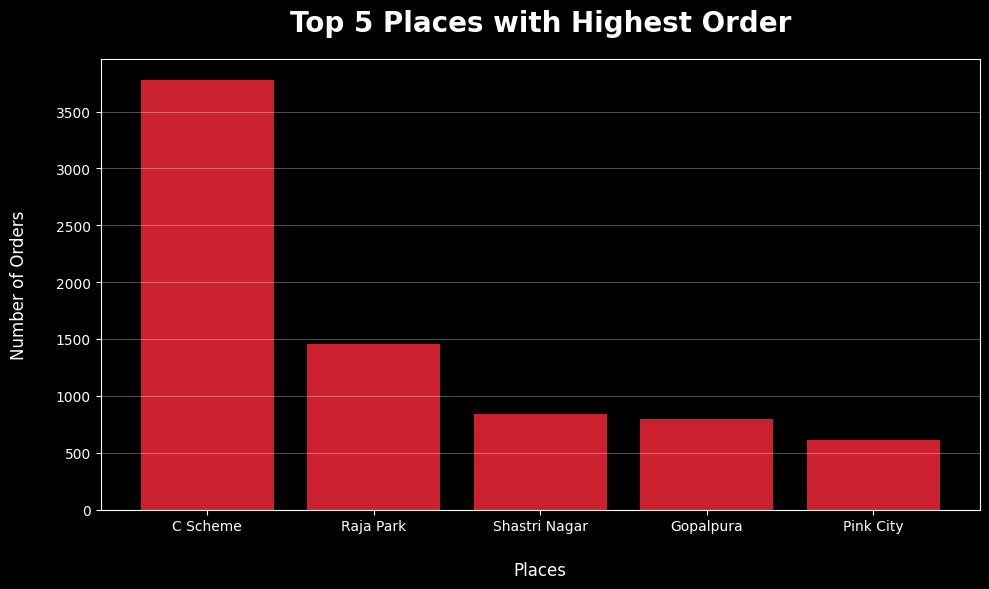

In [32]:
x=topNPlace.index
y=topNPlace.values
plt.figure(figsize=(10,6))

plt.title('Top 5 Places with Highest Order' , pad=20 , fontweight='bold', fontsize=20)
plt.xlabel('Places', labelpad=20, fontsize=12)
plt.ylabel('Number of Orders', labelpad=20, fontsize=12)

plt.bar(x,y, color='#CB202D')
plt.grid(True , alpha=0.3 , axis='y')
plt.tight_layout()

<h2>🚀Insight: Top 5 Places with most expensive food</h2>

In [33]:
expensive_Places=df_jaipur.groupby('Place_Name')['Prices'].mean().sort_values(ascending=False).head(5)

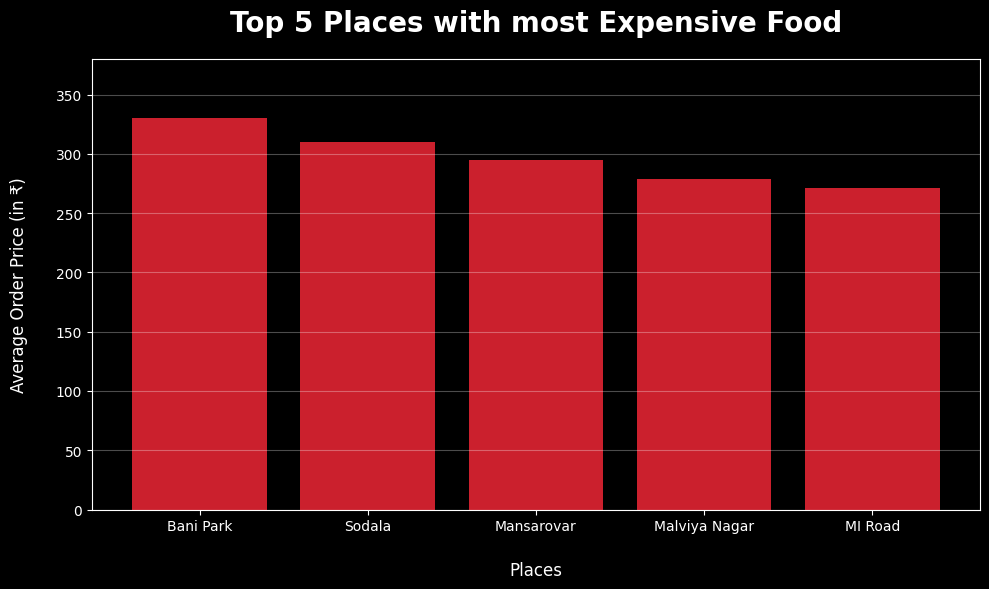

In [34]:
x=expensive_Places.index
y=expensive_Places.values
plt.figure(figsize=(10,6))

plt.title('Top 5 Places with most Expensive Food' , pad=20 , fontweight='bold', fontsize=20)
plt.xlabel('Places', labelpad=20, fontsize=12)
plt.ylabel('Average Order Price (in ₹)', labelpad=20, fontsize=12)
plt.ylim(0,y.max()+50)

plt.bar(x,y, color='#CB202D')
plt.grid(True , alpha=0.3 , axis='y')
plt.tight_layout()

<h2>🚀Insight :Top 5 Most ordered food items</h2>

In [35]:
top5Food=df_jaipur['Item_Name'].value_counts(ascending=False).head(5)

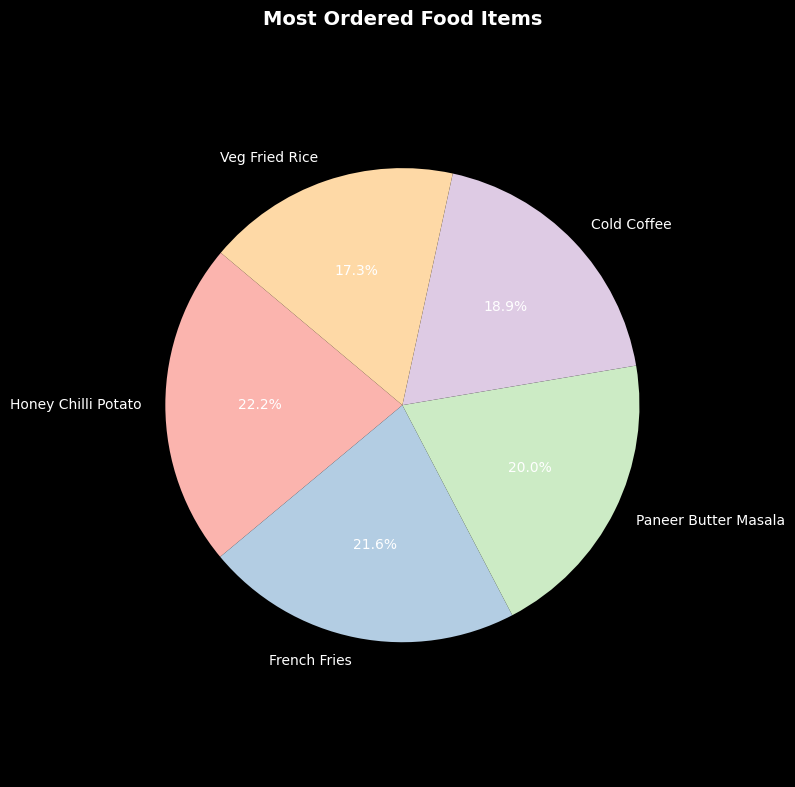

In [36]:
plt.figure(figsize=(8, 8))
plt.pie(
    x=top5Food.values,
    labels=top5Food.index,
    autopct='%1.1f%%',       # Show percentages
    startangle=140,          # Start angle for better layout
    colors=plt.cm.Pastel1.colors  # Optional: nicer color palette
)

plt.title('Most Ordered Food Items', fontsize=14, weight='bold')
plt.axis('equal')  # Equal aspect ratio for a circular pie
plt.tight_layout()
plt.show()

<h2>🚀Insight :Best Selling Cuisines</h2>

In [37]:
df_jaipur.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive,is_value_forMoney
45497,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Cappuccino,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45498,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Smoked Chicken Sandwich,NONE,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45499,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Brrrista Blast Cold Coffee,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45500,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Penne Arrabiata Pasta - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45501,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Garden Fresh Pizza - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True


In [38]:
bestSeller = df_jaipur[df_jaipur['Best_Seller'].str.contains('BESTSELLER',case=False, na=False)]

<strong> Best Selling Cuisine</strong>

In [39]:
bestSeller['Cuisine'].value_counts(ascending=False)

Cuisine
Beverages       837
Fast Food       274
Street Food     196
South Indian    103
Chinese         102
Desserts         97
Rolls            71
North Indian     50
Pizza            49
Mughlai          38
Mithai           28
Biryani          28
Sichuan          27
Burger           25
Bbq              24
Italian          21
Shake            12
Hyderabadi       12
Wraps             9
Name: count, dtype: int64

<h2>🚀Insight : Top 10 Restraunts by popularity</h2>

In [40]:
df_jaipur.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive,is_value_forMoney
45497,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Cappuccino,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45498,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Smoked Chicken Sandwich,NONE,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45499,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Brrrista Blast Cold Coffee,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45500,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Penne Arrabiata Pasta - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45501,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Garden Fresh Pizza - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True


In [41]:
df_jaipur.dtypes

Restaurant_Name           object
Dining_Rating            float64
Delivery_Rating          float64
Dining_Votes               int64
Delivery_Votes             int64
Cuisine                   object
Place_Name                object
City                      object
Item_Name                 object
Best_Seller               object
Votes                      int64
Prices                   float64
Average_Rating           float64
Total_Votes                int64
Price_per_Vote           float64
Log_Price                float64
Is_Bestseller              int64
Restaurant_Popularity      int64
Avg_Rating_Restaurant    float64
Avg_Price_Restaurant     float64
Avg_Rating_Cuisine       float64
Avg_Price_Cuisine        float64
Avg_Rating_City          float64
Avg_Price_City           float64
Is_Highly_Rated            int64
Is_Expensive               int64
is_value_forMoney           bool
dtype: object

In [44]:
popularRestraunt=df_jaipur.groupby('Restaurant_Name')['Total_Votes'].mean()

In [52]:
TopPopularRestraunt=popularRestraunt.sort_values(ascending=False).head(5)

<BarContainer object of 5 artists>

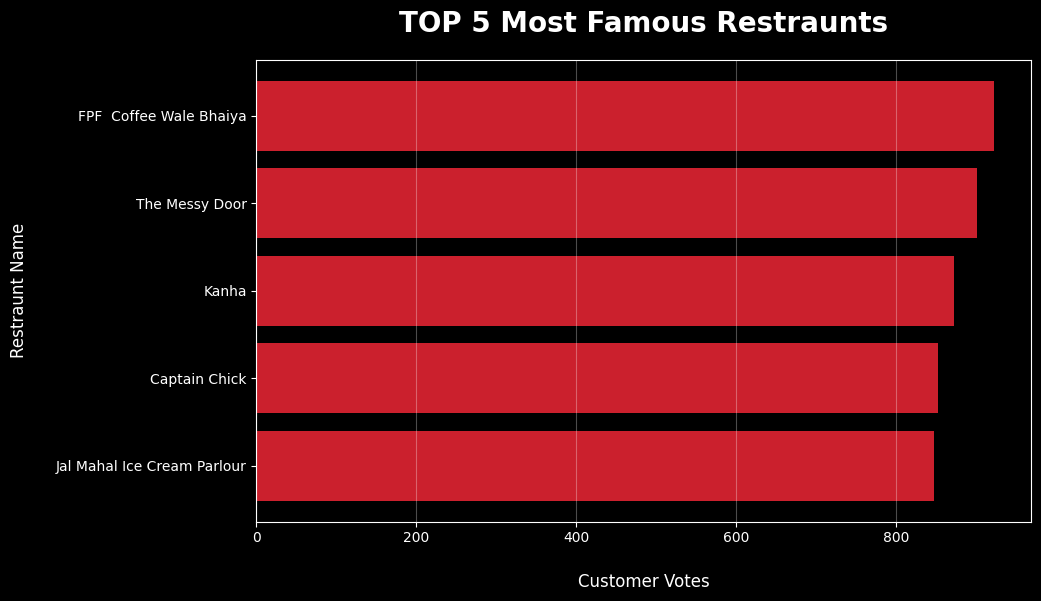

In [62]:
plt.figure(figsize=(10,6))
plt.title('TOP 5 Most Famous Restraunts' , pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Customer Votes', labelpad=20, fontsize=12)
plt.ylabel('Restraunt Name', labelpad=20, fontsize=12)

plt.grid(True ,alpha=0.3 , axis='x')
plt.barh(TopPopularRestraunt.index[::-1],TopPopularRestraunt.values[::-1] , color='#CB202D')


<h2>🚀Insight :Average Rating Per best selling cuisine Cuisine</h2>

In [63]:
df_jaipur.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive,is_value_forMoney
45497,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Cappuccino,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45498,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Smoked Chicken Sandwich,NONE,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45499,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Brrrista Blast Cold Coffee,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45500,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Penne Arrabiata Pasta - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True
45501,Barista Coffee,4.1,4.0,221,441,Desserts,C Scheme,Jaipur,Garden Fresh Pizza - DYN,BESTSELLER,...,140,3.792857,214.128571,3.963493,260.363492,3.89218,217.163255,1,0,True


In [78]:
top10Cuisines=bestSeller['Cuisine'].value_counts(ascending=False).head(10)

In [87]:
top10CuisinesRatings=df_jaipur[df_jaipur['Cuisine'].isin(top10Cuisines.index)].groupby('Cuisine')['Average_Rating'].mean()

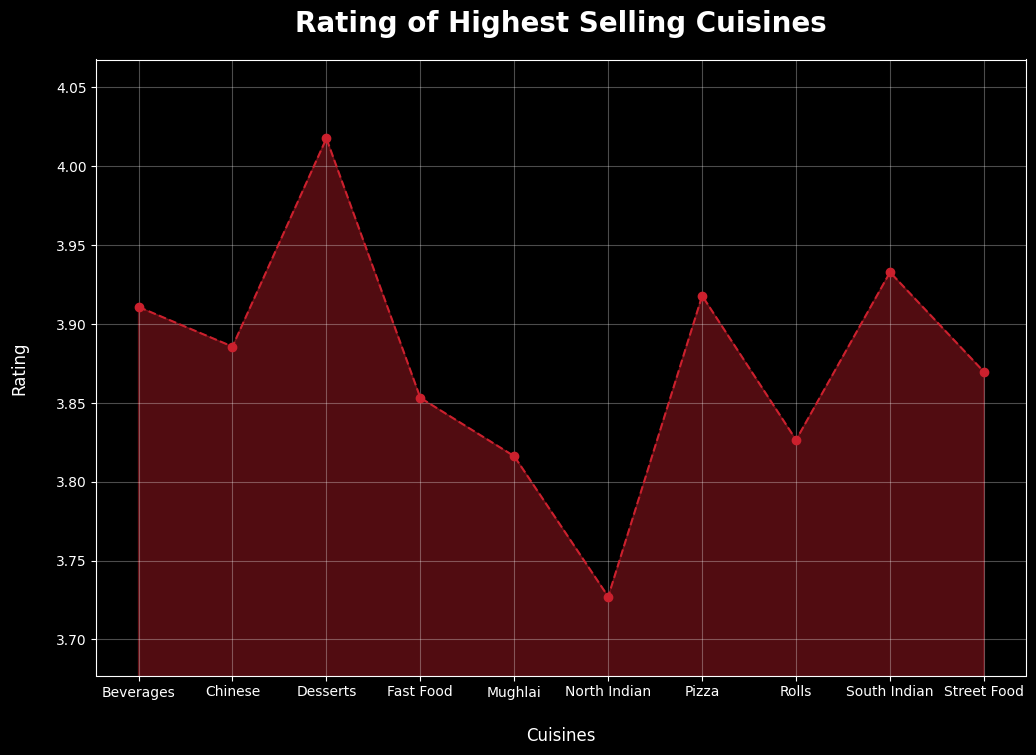

<h2>🚀Insight:Scatter plot: Price vs Rating (color by Is_Bestseller)</h2>

In [107]:
import seaborn as sns

In [116]:
df_sampled = df_jaipur.sample(frac=0.3, random_state=42)  # use 30% of data

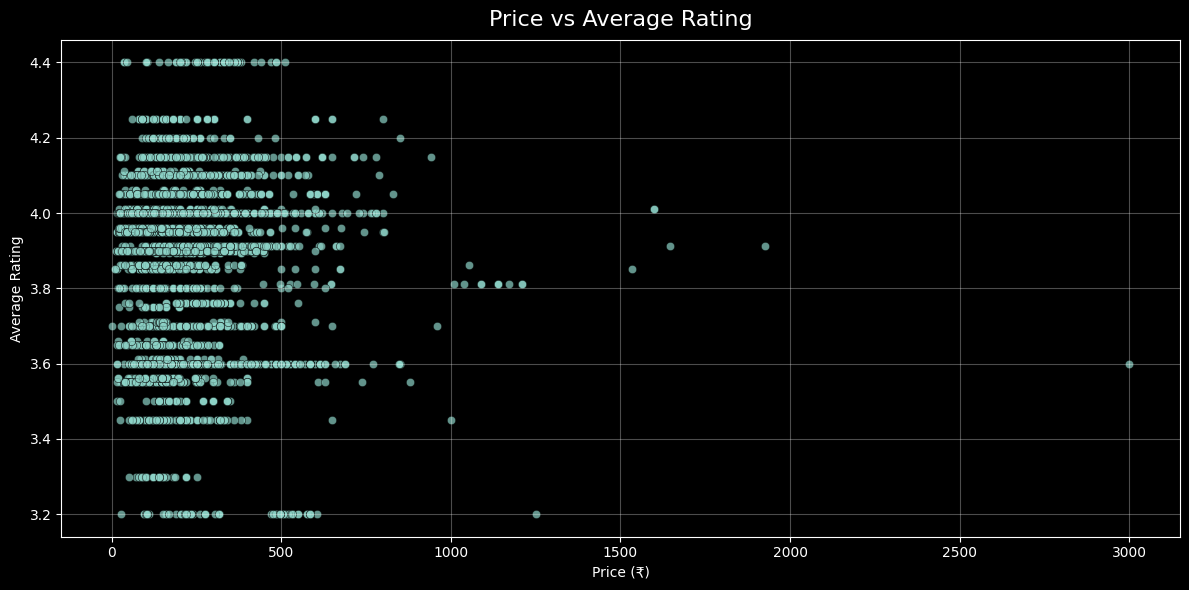

In [123]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df_sampled,
    x='Prices',                        # X-axis: Price of item
    y='Average_Rating',                   # Y-axis: Some kind of rating or score?
    edgecolor='black',
    alpha=0.7
)



plt.title('Price vs Average Rating' , fontsize=16,pad=10)
plt.xlabel('Price (₹)')
plt.ylabel('Average Rating')
plt.grid(True , alpha=0.3)
plt.tight_layout()
plt.show()

In [124]:
sampled_price=df_sampled[df_sampled['Prices']<=1000]

In [127]:
sampled_prices=df_sampled.sample(frac=0.2,random_state=15)

In [129]:
sampledd_prices=sampled_prices[sampled_prices['Prices']<=1000]

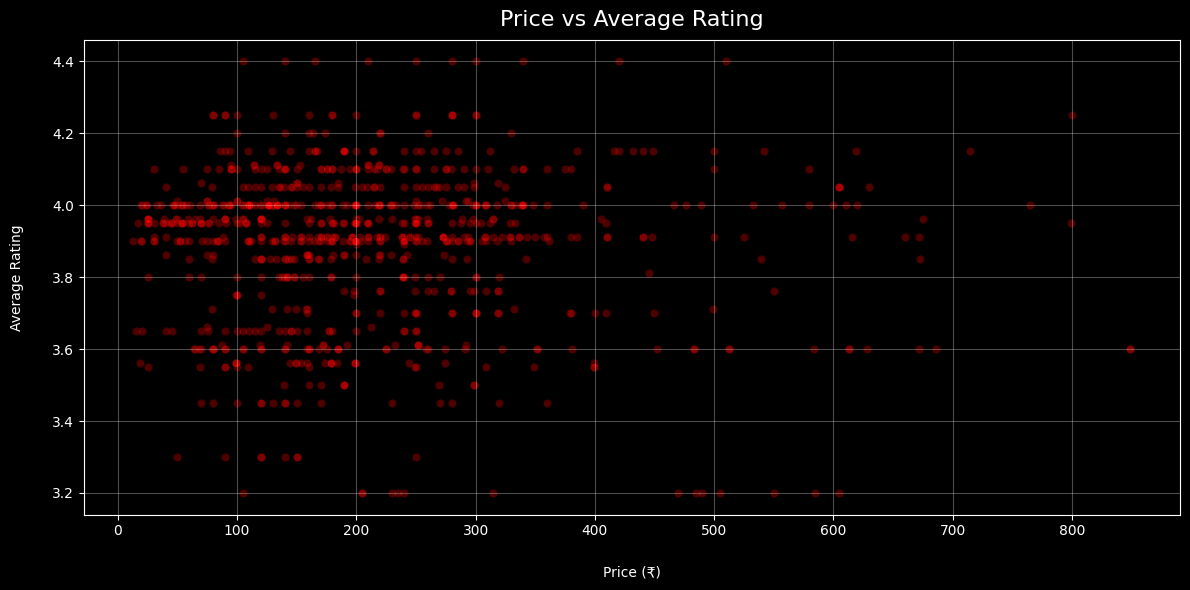

In [135]:
plt.figure(figsize=(12,6))

sns.scatterplot(
   
    x=sampledd_prices['Prices'],                        
    y=sampledd_prices['Average_Rating'],                   
    edgecolor='black',
    color='red',
    alpha=0.3
)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100))


plt.title('Price vs Average Rating' , fontsize=16,pad=10)
plt.xlabel('Price (₹)',labelpad=20)
plt.ylabel('Average Rating',labelpad=20)
plt.grid(True , alpha=0.3)
plt.tight_layout()
plt.show()

<h3>Insights:📊 Scatter Plot: Price vs Average Rating (Filtered)
1. No Strong Correlation
There’s no clear upward or downward trend.

Restaurants with higher prices don’t always have higher ratings.

Most ratings are clustered between 3.6 and 4.2, regardless of price.

👉 Insight: Jaipur’s restaurant ratings don’t strongly depend on price — expensive doesn’t mean better.

2. Dense Cluster at ₹100–₹300
Most restaurants are priced in this range.

Within this band, you see the widest spread of ratings (some below 3.5, some above 4.3).

👉 Insight: ₹100–₹300 is the sweet spot for pricing — plenty of options, and ratings vary widely, indicating fierce competition.</h3>

<h3>🚀Best restraunt to dine in</h3>

In [136]:
df_jaipur_Restraunts.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Place_Name,Votes,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Is_Highly_Rated,Is_Expensive,is_value_forMoney,Category
0,Agarwal Caterers,3.600000,4.3,54.0,0.0,Shastri Nagar,182.494505,3.950000,54.0,42.048776,4.563021,637.0,3.950000,132.351068,False,True,False,low
1,Amma Ki Rasoi,3.822264,3.3,0.0,571.0,MI Road,19.238095,3.561132,571.0,95.639291,5.139276,42.0,3.561132,188.595238,False,True,False,mid
2,Andewalaz,3.300000,4.0,41.0,0.0,Masala Chowk,8.072993,3.650000,41.0,123.424081,5.051875,137.0,3.650000,167.021898,False,True,False,mid
3,Arham,4.100000,4.1,230.0,0.0,Ajmer Highway,4.677215,4.100000,230.0,179.901801,5.312055,316.0,4.100000,228.863924,True,True,True,mid
4,Balaji Fast Food,3.800000,3.4,5.0,708.0,Brahmpuri,2.885714,3.600000,713.0,90.472012,4.683097,105.0,3.600000,118.095238,False,False,False,low


In [137]:
df_jaipur_Restraunts.dtypes

Restaurant_Name           object
Dining_Rating            float64
Delivery_Rating          float64
Dining_Votes             float64
Delivery_Votes           float64
Place_Name                object
Votes                    float64
Average_Rating           float64
Total_Votes              float64
Price_per_Vote           float64
Log_Price                float64
Restaurant_Popularity    float64
Avg_Rating_Restaurant    float64
Avg_Price_Restaurant     float64
Is_Highly_Rated             bool
Is_Expensive                bool
is_value_forMoney           bool
Category                  object
dtype: object

In [139]:
diningRating=df_jaipur_Restraunts.groupby('Restaurant_Name')['Dining_Rating'].sum()

In [141]:
Top5diningRating=diningRating.sort_values(ascending=False).head(5)

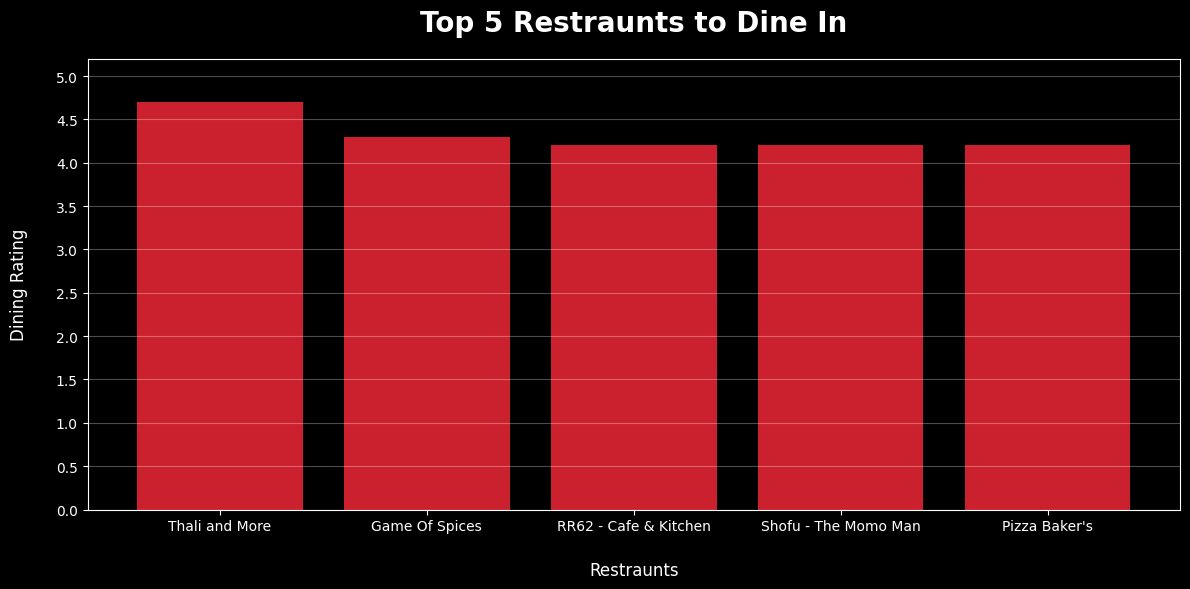

In [146]:
x=Top5diningRating.index
y=Top5diningRating.values
plt.figure(figsize=(12,6))

plt.title('Top 5 Restraunts to Dine In' , pad=20 , fontweight='bold', fontsize=20)
plt.xlabel('Restraunts', labelpad=20, fontsize=12)
plt.ylabel('Dining Rating', labelpad=20, fontsize=12)
plt.ylim(0,y.max()+0.5)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.bar(x,y, color='#CB202D')
plt.grid(True , alpha=0.3 , axis='y')
plt.tight_layout()